Epoch 1000, Loss: 0.24454298954049794
Epoch 2000, Loss: 0.2369103140984214
Epoch 3000, Loss: 0.22338597899344315
Epoch 4000, Loss: 0.17473087972279547
Epoch 5000, Loss: 0.08729090357183533
Epoch 6000, Loss: 0.0706014507340817
Epoch 7000, Loss: 0.0665514144627922
Epoch 8000, Loss: 0.06501414500598604
Epoch 9000, Loss: 0.06424098792822303
Epoch 10000, Loss: 0.06382245349090526

Testing MLP for 3-input XOR gate:
Input: [0 0 0], Predicted Output: [0.498]
Input: [0 0 1], Predicted Output: [0.97]
Input: [0 1 0], Predicted Output: [0.97]
Input: [0 1 1], Predicted Output: [0.042]
Input: [1 0 0], Predicted Output: [0.498]
Input: [1 0 1], Predicted Output: [0.048]
Input: [1 1 0], Predicted Output: [0.048]
Input: [1 1 1], Predicted Output: [0.951]

Accuracy: 87.50%


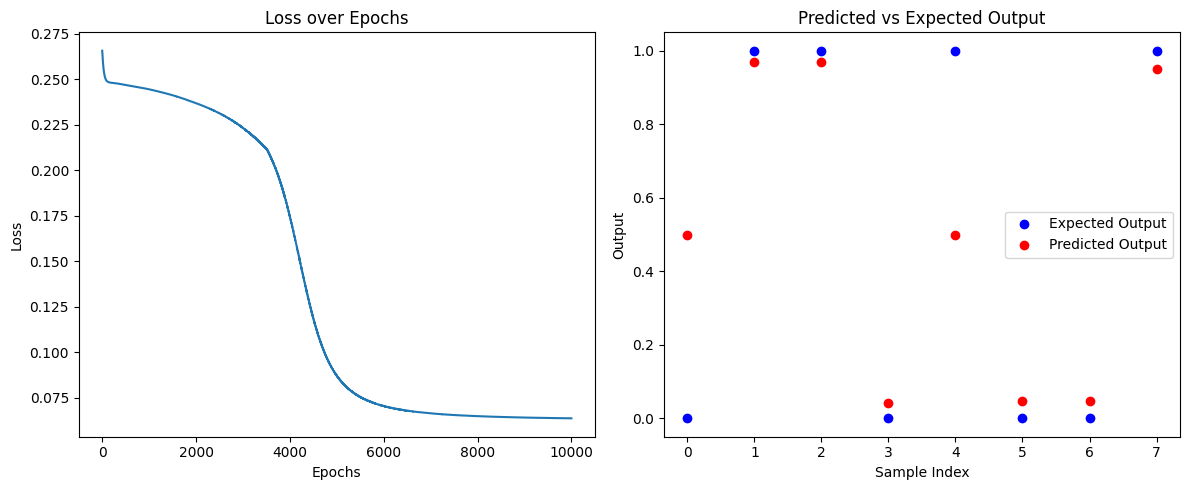

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Sigmoid activation function for output layer
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for output layer
def sigmoid_derivative(x):
    return x * (1 - x)

# XOR input and expected output (3-input XOR truth table)
inputs = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
                   [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
expected_output = np.array([[0], [1], [1], [0], [1], [0], [0], [1]])

# Initialize weights using Xavier initialization
input_layer_neurons = 3  # 3 input neurons for XOR
hidden_layer_neurons_1 = 4  # Hidden layer 1 neurons
hidden_layer_neurons_2 = 4  # Hidden layer 2 neurons
output_neuron = 1  # 1 output neuron for XOR output

np.random.seed(1)

weights_input_hidden_1 = np.random.randn(input_layer_neurons, hidden_layer_neurons_1) * np.sqrt(1 / input_layer_neurons)
weights_hidden_1_hidden_2 = np.random.randn(hidden_layer_neurons_1, hidden_layer_neurons_2) * np.sqrt(1 / hidden_layer_neurons_1)
weights_hidden_output = np.random.randn(hidden_layer_neurons_2, output_neuron) * np.sqrt(1 / hidden_layer_neurons_2)

bias_hidden_1 = np.random.randn(1, hidden_layer_neurons_1) * np.sqrt(1 / input_layer_neurons)
bias_hidden_2 = np.random.randn(1, hidden_layer_neurons_2) * np.sqrt(1 / hidden_layer_neurons_1)
bias_output = np.random.randn(1, output_neuron) * np.sqrt(1 / hidden_layer_neurons_2)

# Learning rate
learning_rate = 0.01
epochs = 10000

# Store loss for plotting
loss_history = []

# Training the MLP using backpropagation
for epoch in range(epochs):
    # Forward pass
    hidden_layer_1_input = np.dot(inputs, weights_input_hidden_1) + bias_hidden_1
    hidden_layer_1_activation = relu(hidden_layer_1_input)

    hidden_layer_2_input = np.dot(hidden_layer_1_activation, weights_hidden_1_hidden_2) + bias_hidden_2
    hidden_layer_2_activation = relu(hidden_layer_2_input)

    output_layer_input = np.dot(hidden_layer_2_activation, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = expected_output - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer_2 = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer_2 = error_hidden_layer_2 * relu_derivative(hidden_layer_2_activation)

    error_hidden_layer_1 = d_hidden_layer_2.dot(weights_hidden_1_hidden_2.T)
    d_hidden_layer_1 = error_hidden_layer_1 * relu_derivative(hidden_layer_1_activation)

    # Updating weights and biases
    weights_hidden_output += hidden_layer_2_activation.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

    weights_hidden_1_hidden_2 += hidden_layer_1_activation.T.dot(d_hidden_layer_2) * learning_rate
    bias_hidden_2 += np.sum(d_hidden_layer_2, axis=0, keepdims=True) * learning_rate

    weights_input_hidden_1 += inputs.T.dot(d_hidden_layer_1) * learning_rate
    bias_hidden_1 += np.sum(d_hidden_layer_1, axis=0, keepdims=True) * learning_rate

    # Store the loss
    loss = np.mean(np.square(error))
    loss_history.append(loss)

    if (epoch+1) % 1000 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss}")

# Testing the MLP
predicted_outputs = []
print("\nTesting MLP for 3-input XOR gate:")
correct_predictions = 0

for i, input_val in enumerate(inputs):
    hidden_layer_1_input = np.dot(input_val, weights_input_hidden_1) + bias_hidden_1
    hidden_layer_1_activation = relu(hidden_layer_1_input)

    hidden_layer_2_input = np.dot(hidden_layer_1_activation, weights_hidden_1_hidden_2) + bias_hidden_2
    hidden_layer_2_activation = relu(hidden_layer_2_input)

    output_layer_input = np.dot(hidden_layer_2_activation, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Store the predicted output (rounded to 0 or 1)
    predicted_outputs.append(predicted_output[0])
    rounded_prediction = np.round(predicted_output[0])
    if rounded_prediction == expected_output[i]:
        correct_predictions += 1

    print(f"Input: {input_val}, Predicted Output: {np.round(predicted_output[0], 3)}")

# Calculate accuracy
accuracy = (correct_predictions / len(expected_output)) * 100
print(f"\nAccuracy: {accuracy:.2f}%")

# Convert predicted outputs to array for plotting
predicted_outputs = np.array(predicted_outputs)

# Plot the loss curve
plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot predicted vs actual outputs
plt.subplot(1, 2, 2)
plt.scatter(range(len(expected_output)), expected_output, color='blue', label='Expected Output')
plt.scatter(range(len(predicted_outputs)), predicted_outputs, color='red', label='Predicted Output')
plt.title('Predicted vs Expected Output')
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1000, Loss: 0.2499588581296068
Epoch 2000, Loss: 0.2496970717358677
Epoch 3000, Loss: 0.24827295191001714
Epoch 4000, Loss: 0.2362560177834191
Epoch 5000, Loss: 0.1898461236939065
Epoch 6000, Loss: 0.12783487407986077
Epoch 7000, Loss: 0.03241495788108423
Epoch 8000, Loss: 0.012900662034768372
Epoch 9000, Loss: 0.007484313361798755
Epoch 10000, Loss: 0.005142659405562686

Testing MLP for XOR gate:
Input: [0 0], Predicted Output: [0.073]
Input: [0 1], Predicted Output: [0.931]
Input: [1 0], Predicted Output: [0.931]
Input: [1 1], Predicted Output: [0.076]

Accuracy: 100.00%


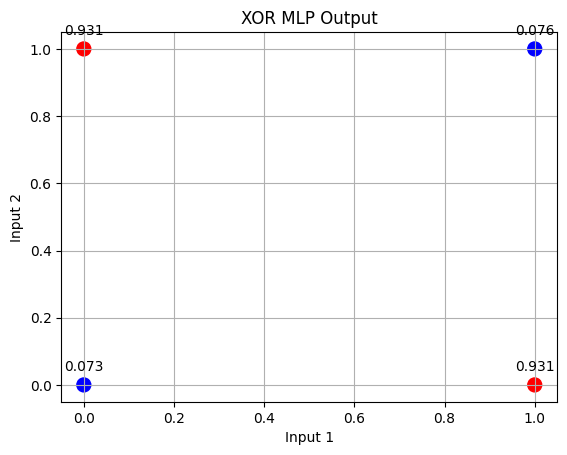

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# XOR input and expected output
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
expected_output = np.array([[0], [1], [1], [0]])

# Initialize weights and biases randomly
input_layer_neurons = 2
hidden_layer_neurons = 2
output_neuron = 1

np.random.seed(1)  # For reproducibility

# Weight initialization
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neuron))

# Bias initialization
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
bias_output = np.random.uniform(size=(1, output_neuron))

# Learning rate
learning_rate = 0.1
epochs = 10000

# Training the MLP using backpropagation
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_layer_activation = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_activation, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = expected_output - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)

    # Updating weights and biases
    weights_hidden_output += hidden_layer_activation.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += inputs.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    if (epoch+1) % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch+1}, Loss: {loss}")

# Testing the MLP and preparing for plotting
predicted_outputs = []

print("\nTesting MLP for XOR gate:")
correct_predictions = 0  # Variable to count correct predictions

for i, input_val in enumerate(inputs):
    hidden_layer_input = np.dot(input_val, weights_input_hidden) + bias_hidden
    hidden_layer_activation = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_activation, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Store predicted output
    predicted_outputs.append(predicted_output[0])

    # Check if the prediction is correct (rounded to 0 or 1)
    if np.round(predicted_output[0]) == expected_output[i]:
        correct_predictions += 1

    print(f"Input: {input_val}, Predicted Output: {np.round(predicted_output[0], 3)}")

# Calculate accuracy
accuracy = (correct_predictions / len(expected_output)) * 100
print(f"\nAccuracy: {accuracy:.2f}%")

# Plotting the points
predicted_outputs = np.array(predicted_outputs).flatten()

# Set colors for the points based on their predicted outputs
colors = ['blue' if output < 0.5 else 'red' for output in predicted_outputs]

plt.scatter(inputs[:, 0], inputs[:, 1], c=colors, s=100, marker='o')

# Annotate points with their predicted output
for i, txt in enumerate(np.round(predicted_outputs, 3)):
    plt.annotate(f'{txt}', (inputs[i, 0], inputs[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title("XOR MLP Output")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()


Epoch 1000, Loss: 0.24973448322406588, Accuracy: 75.00%
Epoch 2000, Loss: 0.24910854144162792, Accuracy: 75.00%
Epoch 3000, Loss: 0.24490270974124662, Accuracy: 75.00%
Epoch 4000, Loss: 0.21362227407139836, Accuracy: 75.00%
Epoch 5000, Loss: 0.14938568670908214, Accuracy: 75.00%
Epoch 6000, Loss: 0.053667791581675964, Accuracy: 100.00%
Epoch 7000, Loss: 0.017936093972018455, Accuracy: 100.00%
Epoch 8000, Loss: 0.009092643070492202, Accuracy: 100.00%
Epoch 9000, Loss: 0.005745527868749884, Accuracy: 100.00%
Epoch 10000, Loss: 0.0040894671836324455, Accuracy: 100.00%

Testing MLP for XOR gate:
Input: [0 0], Predicted Output: [0.065], Expected Output: 0, Correct: True
Input: [0 1], Predicted Output: [0.943], Expected Output: 1, Correct: True
Input: [1 0], Predicted Output: [0.933], Expected Output: 1, Correct: True
Input: [1 1], Predicted Output: [0.066], Expected Output: 0, Correct: True

Test Accuracy: 100.00%


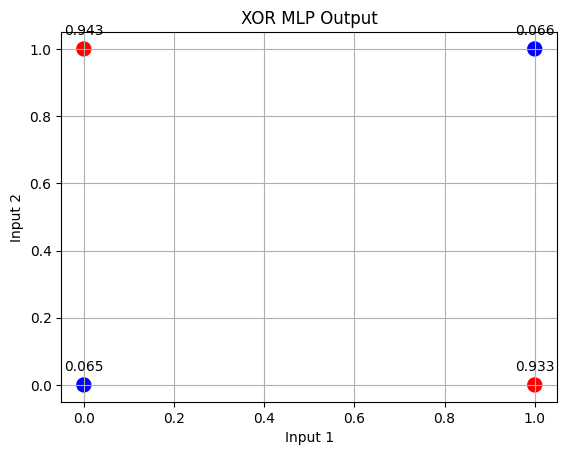

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# XOR input and expected output
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
expected_output = np.array([[0], [1], [1], [0]])

# Initialize weights and biases randomly
input_layer_neurons = 2
hidden_layer_neurons = 4
output_neuron = 1

np.random.seed(1)  # For reproducibility

# Weight initialization
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neuron))

# Bias initialization
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
bias_output = np.random.uniform(size=(1, output_neuron))

# Learning rate
learning_rate = 0.1
epochs = 10000

# Training the MLP using backpropagation
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_layer_activation = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_activation, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = expected_output - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)

    # Updating weights and biases
    weights_hidden_output += hidden_layer_activation.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += inputs.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    if (epoch+1) % 1000 == 0:
        loss = np.mean(np.square(error))

        # Calculate accuracy
        predicted_classes = np.where(predicted_output > 0.5, 1, 0)
        accuracy = np.mean(predicted_classes == expected_output) * 100
        print(f"Epoch {epoch+1}, Loss: {loss}, Accuracy: {accuracy:.2f}%")

# Testing the MLP and preparing for plotting
predicted_outputs = []

print("\nTesting MLP for XOR gate:")
correct_predictions = 0
for i, input_val in enumerate(inputs):
    hidden_layer_input = np.dot(input_val, weights_input_hidden) + bias_hidden
    hidden_layer_activation = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_activation, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)
    predicted_outputs.append(predicted_output[0])

    # Round predictions for comparison and accuracy
    predicted_class = 1 if predicted_output > 0.5 else 0
    is_correct = predicted_class == expected_output[i][0]
    correct_predictions += is_correct
    print(f"Input: {input_val}, Predicted Output: {np.round(predicted_output[0], 3)}, Expected Output: {expected_output[i][0]}, Correct: {is_correct}")

# Final accuracy calculation
test_accuracy = (correct_predictions / len(inputs)) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Plotting the points
predicted_outputs = np.array(predicted_outputs).flatten()

# Set colors for the points based on their predicted outputs
colors = ['blue' if output < 0.5 else 'red' for output in predicted_outputs]

plt.scatter(inputs[:, 0], inputs[:, 1], c=colors, s=100, marker='o')

# Annotate points with their predicted output
for i, txt in enumerate(np.round(predicted_outputs, 3)):
    plt.annotate(f'{txt}', (inputs[i, 0], inputs[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title("XOR MLP Output")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()


Epoch 1000, Loss: 0.00012126249162462643
Epoch 2000, Loss: 3.4663063844676524e-05
Epoch 3000, Loss: 1.5129838155551864e-05
Epoch 4000, Loss: 7.721248225608423e-06
Epoch 5000, Loss: 4.247284010460202e-06
Epoch 6000, Loss: 2.432137927379008e-06
Epoch 7000, Loss: 1.4248314122793247e-06
Epoch 8000, Loss: 8.459368170173709e-07
Epoch 9000, Loss: 5.062683527607926e-07
Epoch 10000, Loss: 3.044597132406958e-07

Testing MLP for XOR gate:
Input: [0 0], Predicted Output: [0.], Expected Output: 0, Correct: True
Input: [0 1], Predicted Output: [1.], Expected Output: 1, Correct: True
Input: [1 0], Predicted Output: [1.], Expected Output: 1, Correct: True
Input: [1 1], Predicted Output: [0.001], Expected Output: 0, Correct: True

Test Accuracy: 100.00%


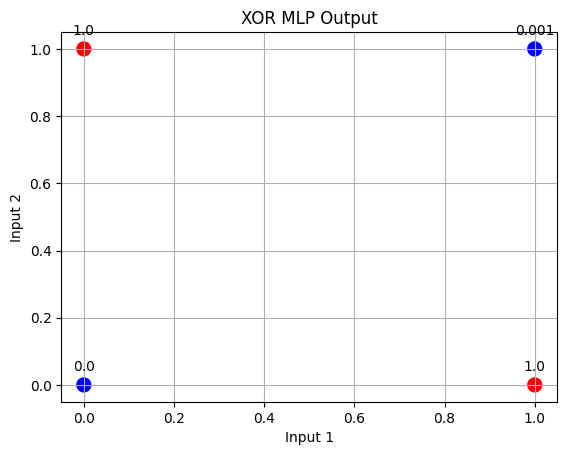

In [7]:
# using different optimizers
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# XOR input and expected output
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
expected_output = np.array([[0], [1], [1], [0]])

# Initialize weights and biases randomly
input_layer_neurons = 2
hidden_layer_neurons = 4
output_neuron = 1

np.random.seed(1)  # For reproducibility

# Weight initialization
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neuron))

# Bias initialization
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
bias_output = np.random.uniform(size=(1, output_neuron))

# Learning rate and epochs
learning_rate = 0.1
epochs = 10000

# Optimizer selection (choose one: 'gd', 'momentum', 'rmsprop', 'adam')
optimizer_choice = 'adam'

# Variables for optimizers
momentum_beta = 0.9
rmsprop_beta = 0.9
adam_beta1 = 0.9
adam_beta2 = 0.999
epsilon = 1e-8

# Momentum terms
v_wih = np.zeros_like(weights_input_hidden)
v_who = np.zeros_like(weights_hidden_output)
v_bh = np.zeros_like(bias_hidden)
v_bo = np.zeros_like(bias_output)

# RMSprop terms
s_wih = np.zeros_like(weights_input_hidden)
s_who = np.zeros_like(weights_hidden_output)
s_bh = np.zeros_like(bias_hidden)
s_bo = np.zeros_like(bias_output)

# Adam terms
m_wih = np.zeros_like(weights_input_hidden)
m_who = np.zeros_like(weights_hidden_output)
m_bh = np.zeros_like(bias_hidden)
m_bo = np.zeros_like(bias_output)

# Training the MLP using backpropagation with different optimizers
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_layer_activation = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_activation, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = expected_output - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)

    if optimizer_choice == 'gd':
        # Gradient Descent update
        weights_hidden_output += hidden_layer_activation.T.dot(d_predicted_output) * learning_rate
        bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
        weights_input_hidden += inputs.T.dot(d_hidden_layer) * learning_rate
        bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    elif optimizer_choice == 'momentum':
        # Momentum update
        v_who = momentum_beta * v_who + (1 - momentum_beta) * hidden_layer_activation.T.dot(d_predicted_output)
        v_bo = momentum_beta * v_bo + (1 - momentum_beta) * np.sum(d_predicted_output, axis=0, keepdims=True)
        v_wih = momentum_beta * v_wih + (1 - momentum_beta) * inputs.T.dot(d_hidden_layer)
        v_bh = momentum_beta * v_bh + (1 - momentum_beta) * np.sum(d_hidden_layer, axis=0, keepdims=True)

        weights_hidden_output += v_who * learning_rate
        bias_output += v_bo * learning_rate
        weights_input_hidden += v_wih * learning_rate
        bias_hidden += v_bh * learning_rate

    elif optimizer_choice == 'rmsprop':
        # RMSprop update
        s_who = rmsprop_beta * s_who + (1 - rmsprop_beta) * (hidden_layer_activation.T.dot(d_predicted_output) ** 2)
        s_bo = rmsprop_beta * s_bo + (1 - rmsprop_beta) * (np.sum(d_predicted_output, axis=0, keepdims=True) ** 2)
        s_wih = rmsprop_beta * s_wih + (1 - rmsprop_beta) * (inputs.T.dot(d_hidden_layer) ** 2)
        s_bh = rmsprop_beta * s_bh + (1 - rmsprop_beta) * (np.sum(d_hidden_layer, axis=0, keepdims=True) ** 2)

        weights_hidden_output += (hidden_layer_activation.T.dot(d_predicted_output) / (np.sqrt(s_who) + epsilon)) * learning_rate
        bias_output += (np.sum(d_predicted_output, axis=0, keepdims=True) / (np.sqrt(s_bo) + epsilon)) * learning_rate
        weights_input_hidden += (inputs.T.dot(d_hidden_layer) / (np.sqrt(s_wih) + epsilon)) * learning_rate
        bias_hidden += (np.sum(d_hidden_layer, axis=0, keepdims=True) / (np.sqrt(s_bh) + epsilon)) * learning_rate

    elif optimizer_choice == 'adam':
        # Adam update
        m_who = adam_beta1 * m_who + (1 - adam_beta1) * hidden_layer_activation.T.dot(d_predicted_output)
        m_bo = adam_beta1 * m_bo + (1 - adam_beta1) * np.sum(d_predicted_output, axis=0, keepdims=True)
        m_wih = adam_beta1 * m_wih + (1 - adam_beta1) * inputs.T.dot(d_hidden_layer)
        m_bh = adam_beta1 * m_bh + (1 - adam_beta1) * np.sum(d_hidden_layer, axis=0, keepdims=True)

        s_who = adam_beta2 * s_who + (1 - adam_beta2) * (hidden_layer_activation.T.dot(d_predicted_output) ** 2)
        s_bo = adam_beta2 * s_bo + (1 - adam_beta2) * (np.sum(d_predicted_output, axis=0, keepdims=True) ** 2)
        s_wih = adam_beta2 * s_wih + (1 - adam_beta2) * (inputs.T.dot(d_hidden_layer) ** 2)
        s_bh = adam_beta2 * s_bh + (1 - adam_beta2) * (np.sum(d_hidden_layer, axis=0, keepdims=True) ** 2)

        m_who_corr = m_who / (1 - adam_beta1 ** (epoch + 1))
        m_bo_corr = m_bo / (1 - adam_beta1 ** (epoch + 1))
        m_wih_corr = m_wih / (1 - adam_beta1 ** (epoch + 1))
        m_bh_corr = m_bh / (1 - adam_beta1 ** (epoch + 1))

        s_who_corr = s_who / (1 - adam_beta2 ** (epoch + 1))
        s_bo_corr = s_bo / (1 - adam_beta2 ** (epoch + 1))
        s_wih_corr = s_wih / (1 - adam_beta2 ** (epoch + 1))
        s_bh_corr = s_bh / (1 - adam_beta2 ** (epoch + 1))

        weights_hidden_output += (m_who_corr / (np.sqrt(s_who_corr) + epsilon)) * learning_rate
        bias_output += (m_bo_corr / (np.sqrt(s_bo_corr) + epsilon)) * learning_rate
        weights_input_hidden += (m_wih_corr / (np.sqrt(s_wih_corr) + epsilon)) * learning_rate
        bias_hidden += (m_bh_corr / (np.sqrt(s_bh_corr) + epsilon)) * learning_rate

    if (epoch+1) % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch+1}, Loss: {loss}")

# Testing the MLP and preparing for plotting
predicted_outputs = []

print("\nTesting MLP for XOR gate:")
correct_predictions = 0
for i, input_val in enumerate(inputs):
    hidden_layer_input = np.dot(input_val, weights_input_hidden) + bias_hidden
    hidden_layer_activation = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_activation, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)
    predicted_outputs.append(predicted_output[0])

    # Round predictions for comparison and accuracy
    predicted_class = 1 if predicted_output > 0.5 else 0
    is_correct = predicted_class == expected_output[i][0]
    correct_predictions += is_correct
    print(f"Input: {input_val}, Predicted Output: {np.round(predicted_output[0], 3)}, Expected Output: {expected_output[i][0]}, Correct: {is_correct}")

# Final accuracy calculation
test_accuracy = (correct_predictions / len(inputs)) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Plotting the points
predicted_outputs = np.array(predicted_outputs).flatten()

# Set colors for the points based on their predicted outputs
colors = ['blue' if output < 0.5 else 'red' for output in predicted_outputs]

plt.scatter(inputs[:, 0], inputs[:, 1], c=colors, s=100, marker='o')

# Annotate points with their predicted output
for i, txt in enumerate(np.round(predicted_outputs, 3)):
    plt.annotate(f'{txt}', (inputs[i, 0], inputs[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title("XOR MLP Output")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()

